ValueError: x and y must have same first dimension, but have shapes (200,) and (10,)

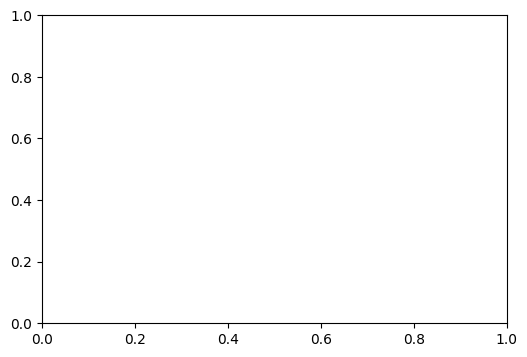

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 100
thetas = np.linspace(0.1, 1.0, 10)  # true θ values
alpha, beta = 2, 2  # prior parameters for MAP

for i, theta_true in enumerate(thetas, 1):
    # Generate dataset
    data = np.random.binomial(1, theta_true, n)
    x_sum = np.sum(data)

    # MLE and MAP
    theta_mle = x_sum / n
    theta_map = (x_sum + alpha - 1) / (n + alpha + beta - 2)

    # Log-likelihood function
    theta_range = np.linspace(0.001, 0.999, 200)
    # log_likelihood = x_sum * np.log(theta_range) + (n - x_sum) * np.log(1 - theta_range)
    likelihood = thetas*k * (1 - thetas)*(n - k)
    # Plot
    plt.figure(figsize=(6, 4))
    plt.plot(theta_range, likelihood, label="Likelihood")
    plt.axvline(theta_true, color="k", linestyle="--", label=f"True θ={theta_true:.1f}")
    plt.axvline(theta_mle, color="r", linestyle="-", label=f"MLE={theta_mle:.2f}")
    plt.axvline(theta_map, color="b", linestyle="-.", label=f"MAP={theta_map:.2f}")

    plt.title(f"Dataset {i} (θ={theta_true:.1f})")
    plt.xlabel("θ")
    plt.ylabel("Log-Likelihood")
    plt.legend()
    plt.grid(True)
    plt.show()

Dataset summary (n=100, seed=42):
Number of heads k = 82
Number of tails = 18
Analytic MLE (k/n) = 0.8200
Grid search results:
 theta maximizing likelihood (grid) = 0.5000
 theta maximizing log-likelihood (grid) = 0.8200
 theta minimizing -log-likelihood (grid) = 0.8200


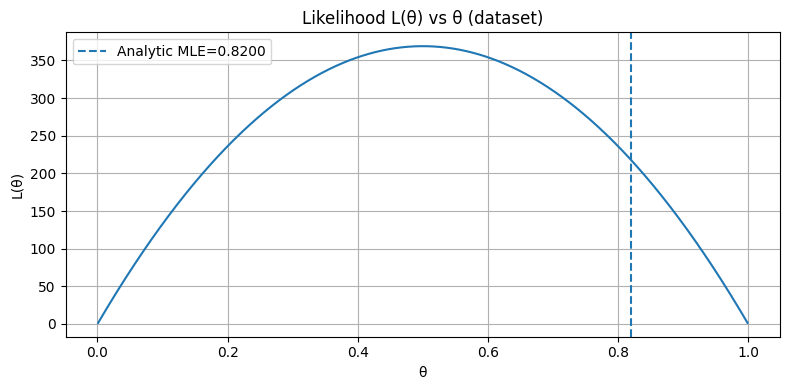

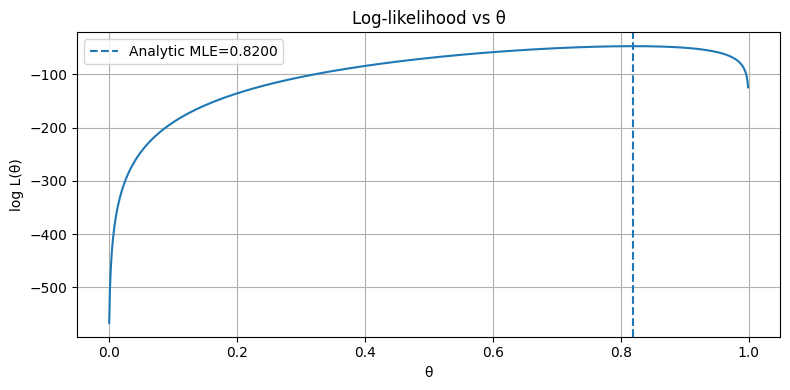

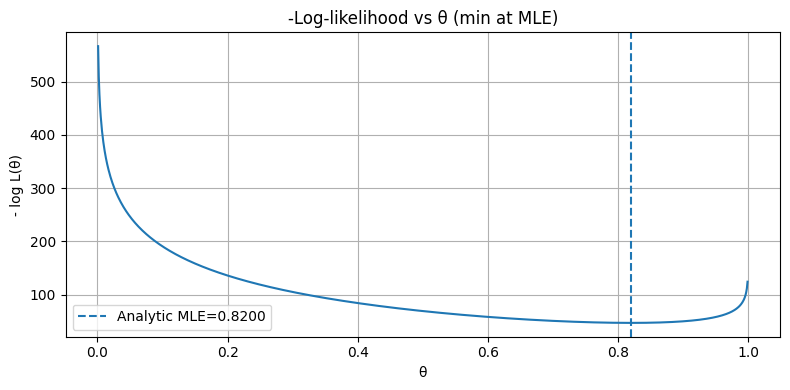


 All outcomes (1=head, 0=tail):
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]


In [6]:
# Generating dataset of 100 Bernoulli trials with theta=0.8,
# computing MLE, log-likelihood, negative log-likelihood, and plotting each.
import random, math
import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
random.seed(47)

# Parameters
n = 100
theta_true = 0.8

# Generate dataset (1=head, 0=tail)
data = [1 if random.random() < theta_true else 0 for _ in range(n)]
k = sum(data)
tails = n - k

# Analytic MLE
theta_mle_analytic = k / n

# Theta grid for evaluation (avoid 0 and 1)
thetas = np.linspace(0.001, 0.999, 999)

# Likelihood, log-likelihood, negative log-likelihood
likelihoods = thetas*k * (1 - thetas)*(n - k)
log_likelihoods = k * np.log(thetas) + (n - k) * np.log(1 - thetas)
neg_log_likelihoods = -log_likelihoods

# Find maxima/minima on grid
idx_max_likelihood = np.argmax(likelihoods)
theta_max_likelihood = thetas[idx_max_likelihood]

idx_max_loglik = np.argmax(log_likelihoods)
theta_max_loglik = thetas[idx_max_loglik]

idx_min_neglog = np.argmin(neg_log_likelihoods)
theta_min_neglog = thetas[idx_min_neglog]

# Print summary
print(f"Dataset summary (n={n}, seed=42):")
print(f"Number of heads k = {k}")
print(f"Number of tails = {tails}")
print(f"Analytic MLE (k/n) = {theta_mle_analytic:.4f}")
print("Grid search results:")
print(f" theta maximizing likelihood (grid) = {theta_max_likelihood:.4f}")
print(f" theta maximizing log-likelihood (grid) = {theta_max_loglik:.4f}")
print(f" theta minimizing -log-likelihood (grid) = {theta_min_neglog:.4f}")

# Plot 1: Likelihood vs theta
plt.figure(figsize=(8,4))
plt.plot(thetas, likelihoods)
plt.xlabel("θ")
plt.ylabel("L(θ)")
plt.title("Likelihood L(θ) vs θ (dataset)")
plt.axvline(theta_mle_analytic, linestyle='--', label=f"Analytic MLE={theta_mle_analytic:.4f}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Log-likelihood vs theta
plt.figure(figsize=(8,4))
plt.plot(thetas, log_likelihoods)
plt.xlabel("θ")
plt.ylabel("log L(θ)")
plt.title("Log-likelihood vs θ")
plt.axvline(theta_mle_analytic, linestyle='--', label=f"Analytic MLE={theta_mle_analytic:.4f}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 3: -Log-likelihood vs theta (to find min)
plt.figure(figsize=(8,4))
plt.plot(thetas, neg_log_likelihoods)
plt.xlabel("θ")
plt.ylabel("- log L(θ)")
plt.title("-Log-likelihood vs θ (min at MLE)")
plt.axvline(theta_mle_analytic, linestyle='--', label=f"Analytic MLE={theta_mle_analytic:.4f}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n All outcomes (1=head, 0=tail):")
print(data)

Dataset summary (n=100, seed=42):
Number of heads k = 41
Number of tails = 59
Analytic MLE (k/n) = 0.4100
Grid search results:
 theta maximizing likelihood (grid) = 0.5000
 theta maximizing log-likelihood (grid) = 0.4100
 theta minimizing -log-likelihood (grid) = 0.4100


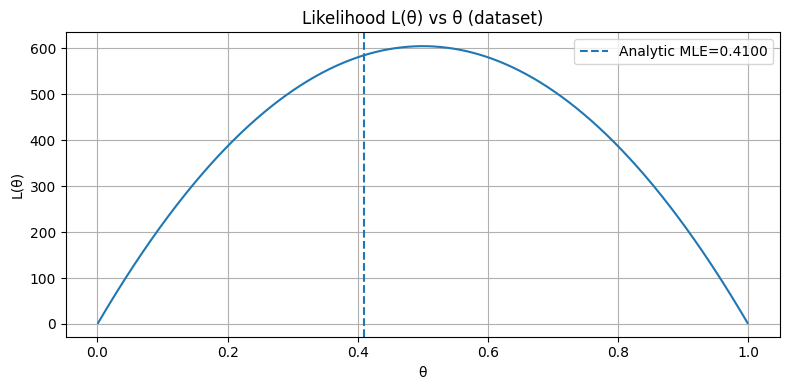


 All outcomes (1=head, 0=tail):
[1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]


In [11]:
# Generating dataset of 100 Bernoulli trials with theta=0.8,
# computing MLE, log-likelihood, negative log-likelihood, and plotting each.
import random, math
import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
random.seed(47)

# Parameters
n = 100
theta_true = 0.4

# Generate dataset (1=head, 0=tail)
data = [1 if random.random() < theta_true else 0 for _ in range(n)]
k = sum(data)
tails = n - k

# Analytic MLE
theta_mle_analytic = k / n

# Theta grid for evaluation (avoid 0 and 1)
thetas = np.linspace(0.001, 0.999, 999)

# Likelihood, log-likelihood, negative log-likelihood
likelihoods = thetas*k * (1 - thetas)*(n - k)
# log_likelihoods = k * np.log(thetas) + (n - k) * np.log(1 - thetas)
# neg_log_likelihoods = -log_likelihoods

# Find maxima/minima on grid
idx_max_likelihood = np.argmax(likelihoods)
theta_max_likelihood = thetas[idx_max_likelihood]

# idx_max_loglik = np.argmax(log_likelihoods)
# theta_max_loglik = thetas[idx_max_loglik]

# idx_min_neglog = np.argmin(neg_log_likelihoods)
# theta_min_neglog = thetas[idx_min_neglog]

# Print summary
print(f"Dataset summary (n={n}, seed=42):")
print(f"Number of heads k = {k}")
print(f"Number of tails = {tails}")
print(f"Analytic MLE (k/n) = {theta_mle_analytic:.4f}")
print("Grid search results:")
print(f" theta maximizing likelihood (grid) = {theta_max_likelihood:.4f}")
print(f" theta maximizing log-likelihood (grid) = {theta_max_loglik:.4f}")
print(f" theta minimizing -log-likelihood (grid) = {theta_min_neglog:.4f}")

# Plot 1: Likelihood vs theta
plt.figure(figsize=(8,4))
plt.plot(thetas, likelihoods)
plt.xlabel("θ")
plt.ylabel("L(θ)")
plt.title("Likelihood L(θ) vs θ (dataset)")
plt.axvline(theta_mle_analytic, linestyle='--', label=f"Analytic MLE={theta_mle_analytic:.4f}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Log-likelihood vs theta
# plt.figure(figsize=(8,4))
# plt.plot(thetas, log_likelihoods)
# plt.xlabel("θ")
# plt.ylabel("log L(θ)")
# plt.title("Log-likelihood vs θ")
# plt.axvline(theta_mle_analytic, linestyle='--', label=f"Analytic MLE={theta_mle_analytic:.4f}")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# # Plot 3: -Log-likelihood vs theta (to find min)
# plt.figure(figsize=(8,4))
# plt.plot(thetas, neg_log_likelihoods)
# plt.xlabel("θ")
# plt.ylabel("- log L(θ)")
# plt.title("-Log-likelihood vs θ (min at MLE)")
# plt.axvline(theta_mle_analytic, linestyle='--', label=f"Analytic MLE={theta_mle_analytic:.4f}")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

print("\n All outcomes (1=head, 0=tail):")
print(data)

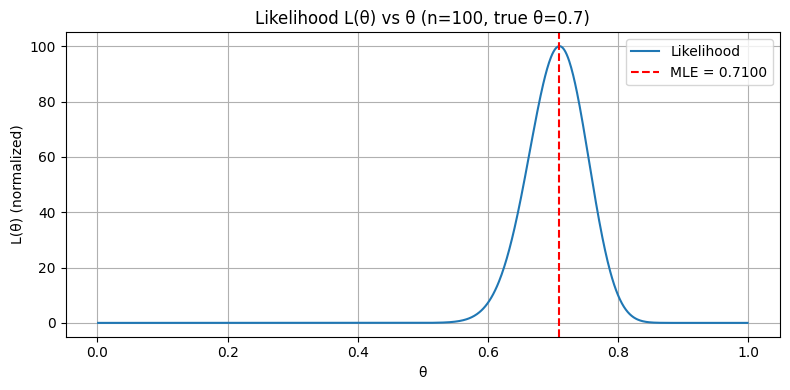

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 100
theta_true = 0.7  # true probability of heads

# Generate dataset (Bernoulli trials)
data = np.random.binomial(1, theta_true, n)
x_sum = np.sum(data)  # number of heads

# Analytic MLE
theta_mle_analytic = x_sum / n

# Likelihood function
theta_range = np.linspace(0.001, 0.999, 999)
likelihood = (theta_range**x_sum) * ((1 - theta_range)**(n - x_sum))

# Normalize for better plotting
likelihoods = (likelihood / likelihood.max())*100

# Plot
plt.figure(figsize=(8,4))
plt.plot(theta_range, likelihoods, label="Likelihood")
plt.xlabel("θ")
plt.ylabel("L(θ) (normalized)")
plt.title(f"Likelihood L(θ) vs θ (n={n}, true θ={theta_true})")
plt.axvline(theta_mle_analytic, linestyle='--', color="red", 
            label=f"MLE = {theta_mle_analytic:.4f}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



--- θ_true = 0.10 ---
Number of heads k = 9
Number of tails = 91
Analytic MLE = 0.0900
Grid max likelihood θ = 0.0900
Grid max log-likelihood θ = 0.0900
Grid min -log-likelihood θ = 0.0900


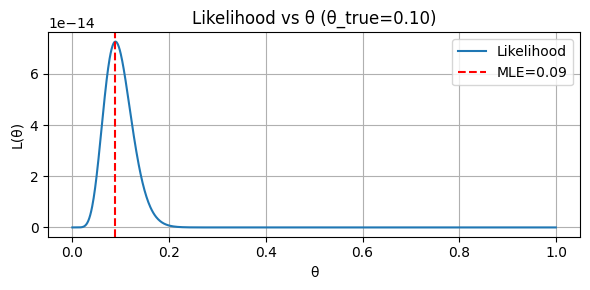


--- θ_true = 0.19 ---
Number of heads k = 22
Number of tails = 78
Analytic MLE = 0.2200
Grid max likelihood θ = 0.2200
Grid max log-likelihood θ = 0.2200
Grid min -log-likelihood θ = 0.2200


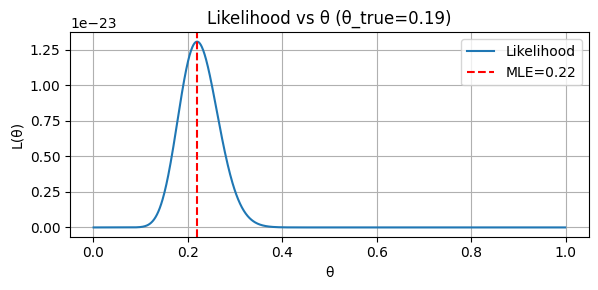


--- θ_true = 0.28 ---
Number of heads k = 23
Number of tails = 77
Analytic MLE = 0.2300
Grid max likelihood θ = 0.2300
Grid max log-likelihood θ = 0.2300
Grid min -log-likelihood θ = 0.2300


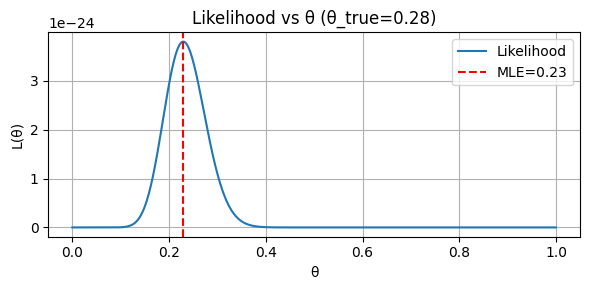


--- θ_true = 0.37 ---
Number of heads k = 36
Number of tails = 64
Analytic MLE = 0.3600
Grid max likelihood θ = 0.3600
Grid max log-likelihood θ = 0.3600
Grid min -log-likelihood θ = 0.3600


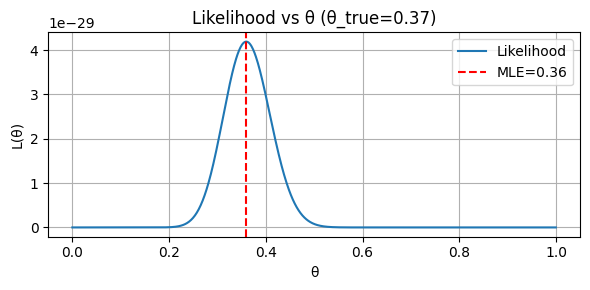


--- θ_true = 0.46 ---
Number of heads k = 44
Number of tails = 56
Analytic MLE = 0.4400
Grid max likelihood θ = 0.4400
Grid max log-likelihood θ = 0.4400
Grid min -log-likelihood θ = 0.4400


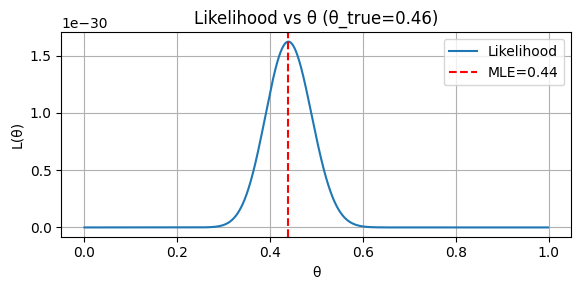


--- θ_true = 0.54 ---
Number of heads k = 45
Number of tails = 55
Analytic MLE = 0.4500
Grid max likelihood θ = 0.4500
Grid max log-likelihood θ = 0.4500
Grid min -log-likelihood θ = 0.4500


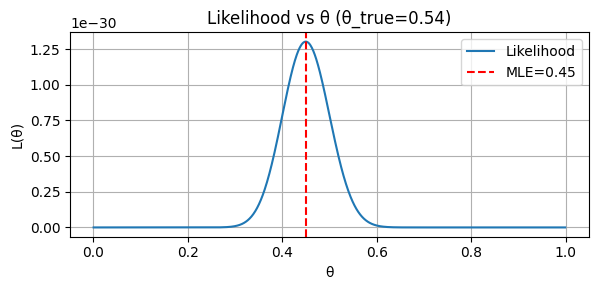


--- θ_true = 0.63 ---
Number of heads k = 61
Number of tails = 39
Analytic MLE = 0.6100
Grid max likelihood θ = 0.6100
Grid max log-likelihood θ = 0.6100
Grid min -log-likelihood θ = 0.6100


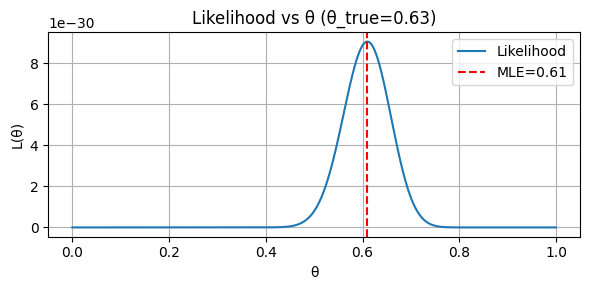


--- θ_true = 0.72 ---
Number of heads k = 73
Number of tails = 27
Analytic MLE = 0.7300
Grid max likelihood θ = 0.7300
Grid max log-likelihood θ = 0.7300
Grid min -log-likelihood θ = 0.7300


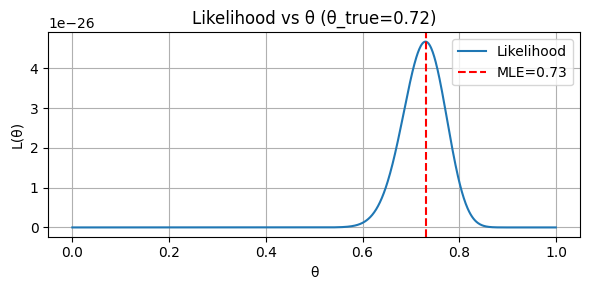


--- θ_true = 0.81 ---
Number of heads k = 84
Number of tails = 16
Analytic MLE = 0.8400
Grid max likelihood θ = 0.8400
Grid max log-likelihood θ = 0.8400
Grid min -log-likelihood θ = 0.8400


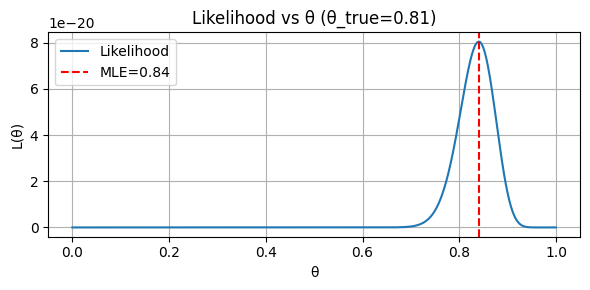


--- θ_true = 0.90 ---
Number of heads k = 92
Number of tails = 8
Analytic MLE = 0.9200
Grid max likelihood θ = 0.9200
Grid max log-likelihood θ = 0.9200
Grid min -log-likelihood θ = 0.9200


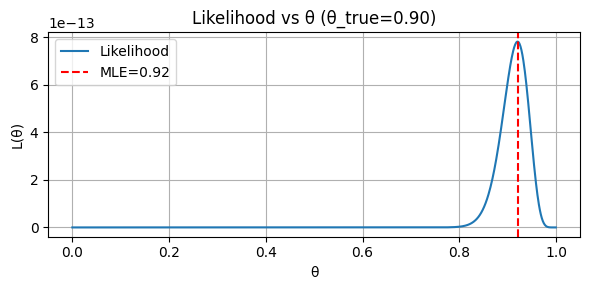

In [22]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
random.seed(47)
np.random.seed(47)

# Parameters
n = 100
theta_values = np.linspace(0.1, 0.9, 10)  # 10 theta values between 0.1 and 0.9

# Grid for plotting likelihood
thetas_grid = np.linspace(0.001, 0.999, 999)

for theta_true in theta_values:
    # Generate dataset
    data = [1 if random.random() < theta_true else 0 for _ in range(n)]
    k = sum(data)
    tails = n - k

    # Analytic MLE
    theta_mle_analytic = k / n

    # Likelihood, log-likelihood, negative log-likelihood
    likelihoods = thetas_grid**k * (1 - thetas_grid)**tails
    log_likelihoods = k * np.log(thetas_grid) + tails * np.log(1 - thetas_grid)
    neg_log_likelihoods = -log_likelihoods

    # Find maxima/minima on grid
    theta_max_likelihood = thetas_grid[np.argmax(likelihoods)]
    theta_max_loglik = thetas_grid[np.argmax(log_likelihoods)]
    theta_min_neglog = thetas_grid[np.argmin(neg_log_likelihoods)]

    # Print summary
    print(f"\n--- θ_true = {theta_true:.2f} ---")
    print(f"Number of heads k = {k}")
    print(f"Number of tails = {tails}")
    print(f"Analytic MLE = {theta_mle_analytic:.4f}")
    print(f"Grid max likelihood θ = {theta_max_likelihood:.4f}")
    print(f"Grid max log-likelihood θ = {theta_max_loglik:.4f}")
    print(f"Grid min -log-likelihood θ = {theta_min_neglog:.4f}")

    # Plot Likelihood
    plt.figure(figsize=(6,3))
    plt.plot(thetas_grid, likelihoods, label="Likelihood")
    plt.axvline(theta_mle_analytic, linestyle='--', color='red', label=f"MLE={theta_mle_analytic:.2f}")
    plt.title(f"Likelihood vs θ (θ_true={theta_true:.2f})")
    plt.xlabel("θ")
    plt.ylabel("L(θ)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
